# Laboratorul 8

Rezolvați exercițiile de mai jos în celulele care v-au fost puse la dispoziție. La final, rulați tot notebook-ul și asigurați-vă că nu aveți erori. Salvați fișierul și încărcați-l în assignment-ul de Teams corespunzător grupei voastre.

In [1]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

## Exercițiul 1

 Scrieți câte o funcție prin care să construiți o **fereastră    dreptunghiulară**, respectiv o **fereastră de tip Hanning**. Funcțiile primesc ca parametru **lungimea ferestrei**.

 Generați și afișați o sinusoidă cu frecvență $f = 100 \, \text{Hz}$, amplitudine unitară și fază nulă, apoi treceți-o prin cele două tipuri de ferestre (pentru lungimea $N_w = 200$) și afișați grafic rezultatul.

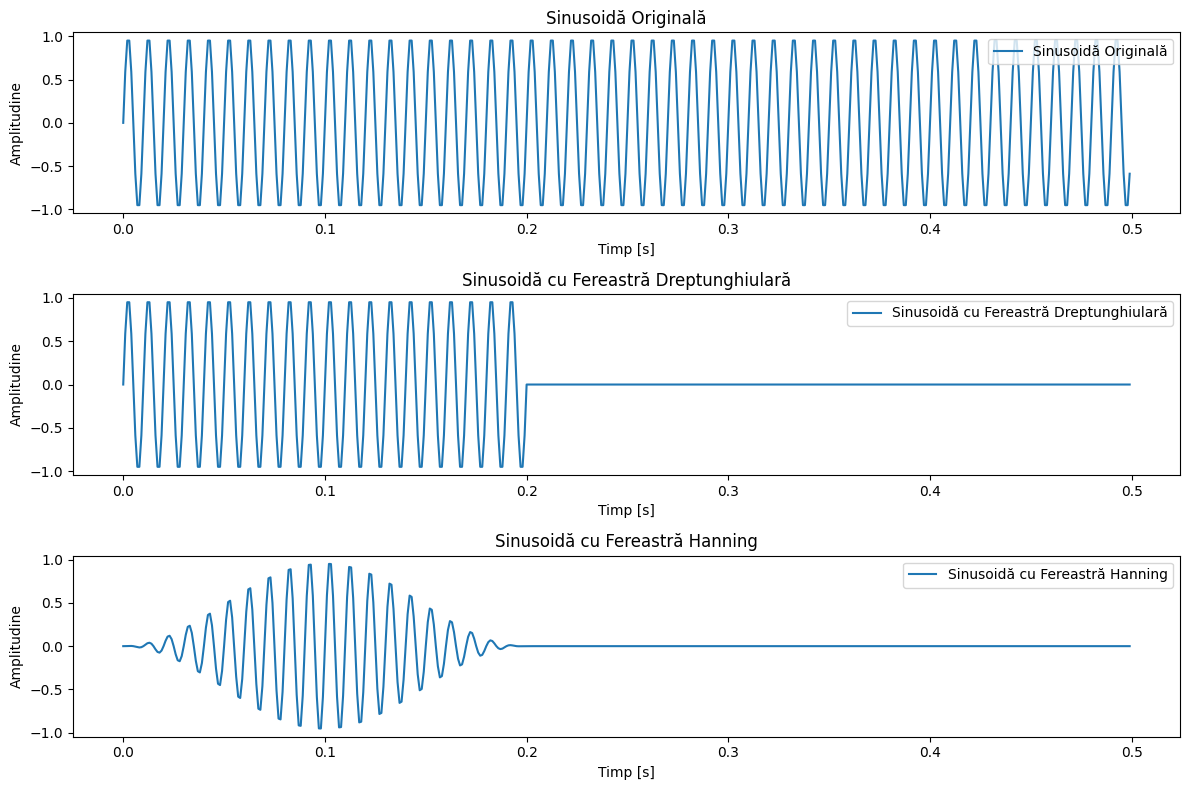

In [6]:
def rectangular_window(N):
    return np.ones(N)

def hanning_window(N):
    return np.hanning(N)

f = 100  
fs = 1000   
t = np.arange(0, 0.5, 1/fs)  # timpul extins pentru a observa diferența

sinusoid = np.sin(2 * np.pi * f * t)

Nw = 200
rect_window = rectangular_window(Nw)
hann_window = hanning_window(Nw)

rect_window_full = np.concatenate([rect_window, np.zeros(len(sinusoid) - Nw)])
hann_window_full = np.concatenate([hann_window, np.zeros(len(sinusoid) - Nw)])

sinusoid_rect = sinusoid * rect_window_full
sinusoid_hann = sinusoid * hann_window_full

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t, sinusoid, label="Sinusoidă Originală")
plt.title("Sinusoidă Originală")
plt.xlabel("Timp [s]")
plt.ylabel("Amplitudine")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, sinusoid_rect, label="Sinusoidă cu Fereastră Dreptunghiulară")
plt.title("Sinusoidă cu Fereastră Dreptunghiulară")
plt.xlabel("Timp [s]")
plt.ylabel("Amplitudine")
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t, sinusoid_hann, label="Sinusoidă cu Fereastră Hanning")
plt.title("Sinusoidă cu Fereastră Hanning")
plt.xlabel("Timp [s]")
plt.ylabel("Amplitudine")
plt.legend()

plt.tight_layout()
plt.show()


## Exercițiul 2

Fișierul `traffic-one-week.csv` conține date de trafic colectate pe o perioadă de o săptămână. Perioada de eșantionare este de o oră, iar valorile măsurate reprezintă numărul de vehicule care trec printr-o intersecție.

### Subpunctul a)

Încărcați datele în memorie și selectați din semnalul dat o porțiune corespunzătoare pentru **3 zile**, `x`, pe care veți lucra în continuare.

In [7]:
data = np.loadtxt('traffic-one-week.csv')

# 24 ore * 3 zile = 72 de măsurători
three_days_data = data[:72]

### Subpunctul b)

Utilizați funcția `np.convolve(x, np.ones(w), 'valid') / w` pentru a realiza un filtru de tip medie alunecătoare și neteziți semnalul obținut anterior. Setați dimensiuni diferite ale ferestrei (variabila `w` în codul de mai sus), spre exemplu $5$, $9$, $13$, $17$. Afișați grafic semnalele obținute.

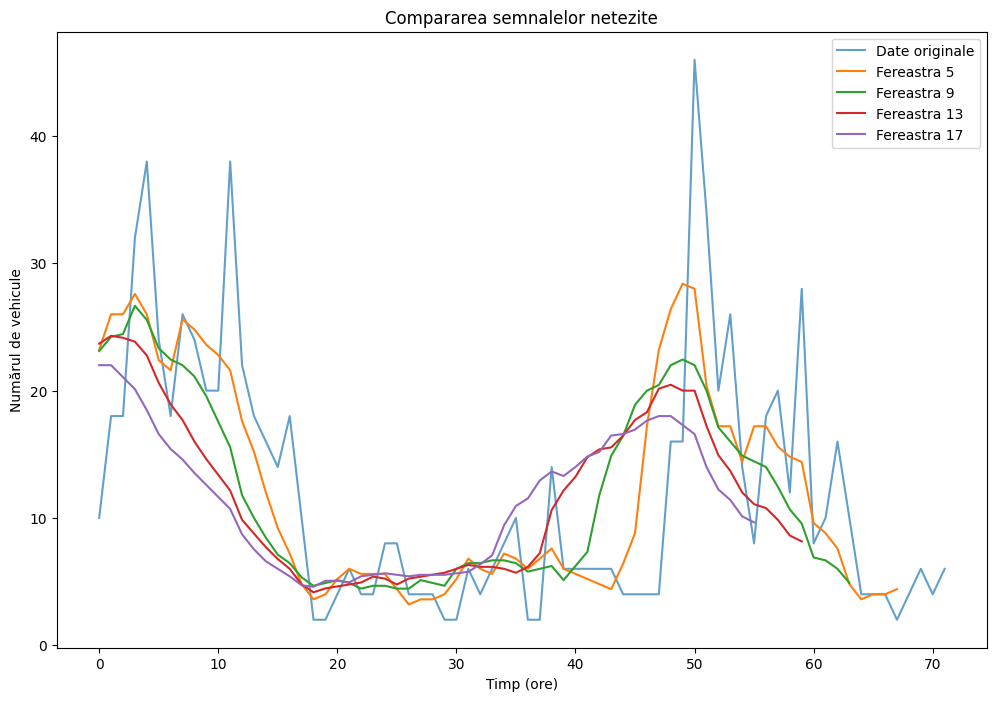

In [8]:
window_sizes = [5, 9, 13, 17]
plt.figure(figsize=(12, 8))
plt.plot(three_days_data, label='Date originale', alpha=0.7)

for w in window_sizes:
    smoothed_signal = np.convolve(three_days_data, np.ones(w), 'valid') / w
    plt.plot(smoothed_signal, label=f'Fereastra {w}')

plt.title('Compararea semnalelor netezite')
plt.xlabel('Timp (ore)')
plt.ylabel('Numărul de vehicule')
plt.legend()

plt.show()


### Subpunctul c)

Dorinți să filtrați **zgomotul** (frecvențe înalte) din semnalul cu date de trafic. Alegeți o **frecvență de tăiere** pentru un filtru trece-jos pe care îl veți crea în subpunctul următor. Argumentați alegerea făcută.

**Indicație:** transformata Fourier a semnalului, calculată în laboratorul anterior, ar putea să vă ajute cu luarea acestei decizii.

Pe lângă valoarea frecvenței în Herzi, determinați și valoarea ei normalizată între 0 și 1, unde 1 reprezintă frecvența Nyquist pentru semnalul de trafic.

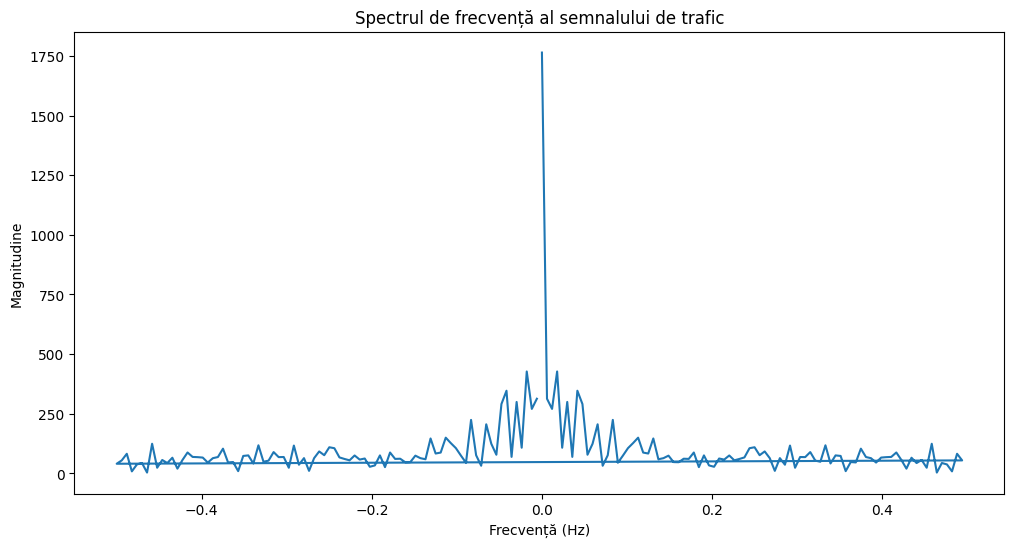

Frecvența de tăiere normalizată: 0.2


In [9]:
fft_result = np.fft.fft(data)
frequencies = np.fft.fftfreq(len(data), d=1)  # d=1 pentru eșantionare orară

magnitude = np.abs(fft_result)

plt.figure(figsize=(12, 6))
plt.plot(frequencies, magnitude)
plt.title("Spectrul de frecvență al semnalului de trafic")
plt.xlabel("Frecvență (Hz)")
plt.ylabel("Magnitudine")
plt.show()

f_cutoff = 0.1  

f_nyquist = 0.5  
f_normalized = f_cutoff / f_nyquist

print("Frecvența de tăiere normalizată:", f_normalized)


### Subpunctul d)

Utilizați funcția `scipy.signal.butter`, respectiv funcția `scipy.signal.cheby1`, pentru a **proiecta** filtrele Butterworth și Chebyshev de ordin 5, cu frecvența de tăiere $W_n$ (valoare normalizată), stabilită la subpunctul anterior.
        
Pentru început, setați atenuarea ondulațiilor la `rp = 5` (dB), urmând ca apoi să încercați și alte valori.

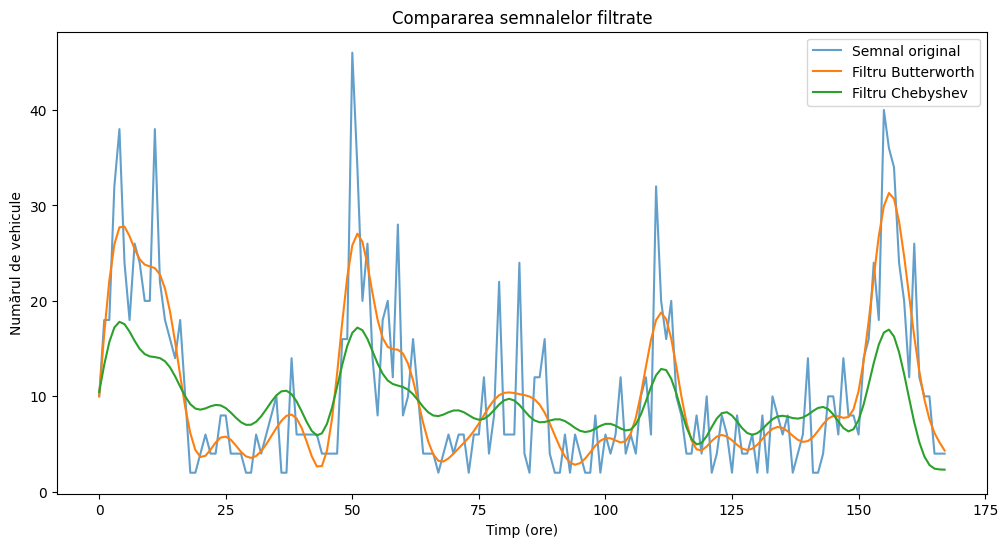

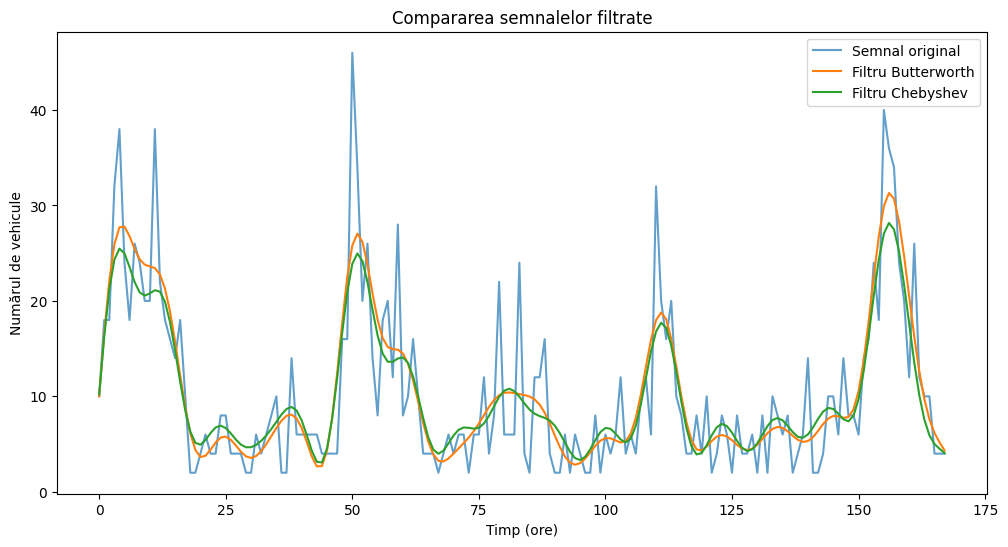

In [29]:
from scipy.signal import butter, cheby1, filtfilt

b_butter, a_butter = butter(N=5, Wn=f_normalized, btype='low')

rp = 5  # Atenuarea ondulațiilor în dB
b_cheby, a_cheby = cheby1(N=5, rp=rp, Wn=f_normalized, btype='low')

filtered_butter = filtfilt(b_butter, a_butter, data)
filtered_cheby = filtfilt(b_cheby, a_cheby, data)

plt.figure(figsize=(12, 6))
plt.plot(data, label='Semnal original', alpha=0.7)
plt.plot(filtered_butter, label='Filtru Butterworth')
plt.plot(filtered_cheby, label='Filtru Chebyshev')
plt.title('Compararea semnalelor filtrate')
plt.xlabel('Timp (ore)')
plt.ylabel('Numărul de vehicule')
plt.legend()
plt.show()

rp = 1
b_butter, a_butter = butter(N=5, Wn=f_normalized, btype='low')
b_cheby, a_cheby = cheby1(N=5, rp=rp, Wn=f_normalized, btype='low')

filtered_butter = filtfilt(b_butter, a_butter, data)
filtered_cheby = filtfilt(b_cheby, a_cheby, data)

plt.figure(figsize=(12, 6))
plt.plot(data, label='Semnal original', alpha=0.7)
plt.plot(filtered_butter, label='Filtru Butterworth')
plt.plot(filtered_cheby, label='Filtru Chebyshev')
plt.title('Compararea semnalelor filtrate')
plt.xlabel('Timp (ore)')
plt.ylabel('Numărul de vehicule')
plt.legend()
plt.show()

#vad ca daca micsorez rp cele 2 filtre seamana mai mult


### Subpunctul e)

**Filtrați** datele de trafic cu cele 2 filtre și afișați semnalele filtrate împreună cu datele brute. Ce filtru alegeți dintre cele două și de ce?

In [22]:
# aici mi am creat eu functiile ca vad ca la ultimul subpunct am nevoie din nou de acelasi cod
def create_filter(filter_type, order, f_normalized, rp=None):
    if filter_type == 'butter':
        b, a = butter(N=order, Wn=f_normalized, btype='low')
    elif filter_type == 'cheby':
        b, a = cheby1(N=order, rp=rp, Wn=f_normalized, btype='low')
    return b, a

def apply_filter(b, a, data):
    return filtfilt(b, a, data)

def plot_filtered_signals(data, filtered_signals, labels, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data, label='Semnal original', alpha=0.7)
    for signal, label in zip(filtered_signals, labels):
        plt.plot(signal, label=label)
    plt.title(title)
    plt.xlabel('Timp (ore)')
    plt.ylabel('Numărul de vehicule')
    plt.legend()
    plt.show()

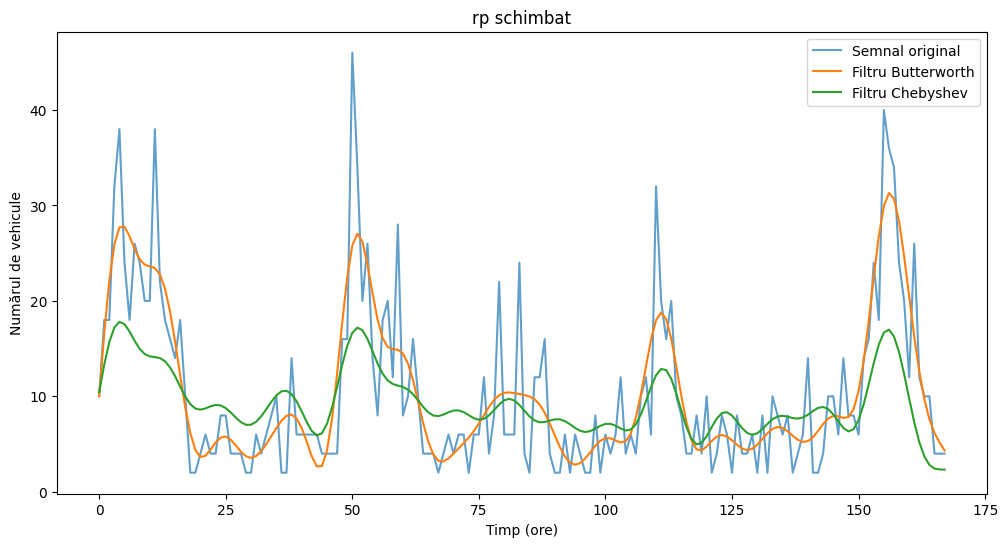

In [25]:
b_butter, a_butter = create_filter('butter', 5, f_normalized)
b_cheby, a_cheby = create_filter('cheby', 5, f_normalized, rp=5)

filtered_butter = apply_filter(b_butter, a_butter, data)
filtered_cheby = apply_filter(b_cheby, a_cheby, data)

plot_filtered_signals(data, [filtered_butter, filtered_cheby], ['Filtru Butterworth', 'Filtru Chebyshev'], title)

### Subpunctul f)

Reproiectați filtrele alegând atât un ordin mai mic, cât și unul mai mare. De asemenea, reproiectați filtrul Chebyshev cu alte valori ale `rp` și observați efectul.

Stabiliți **valorile optime** ale parametrilor pentru a vă atinge scopul (cel de a filtra zgomotul din semnal).

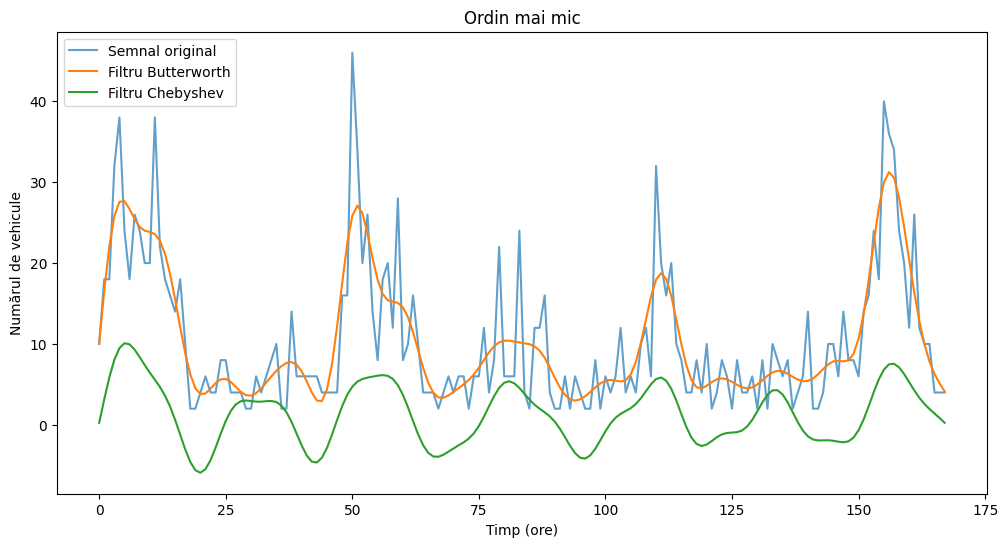

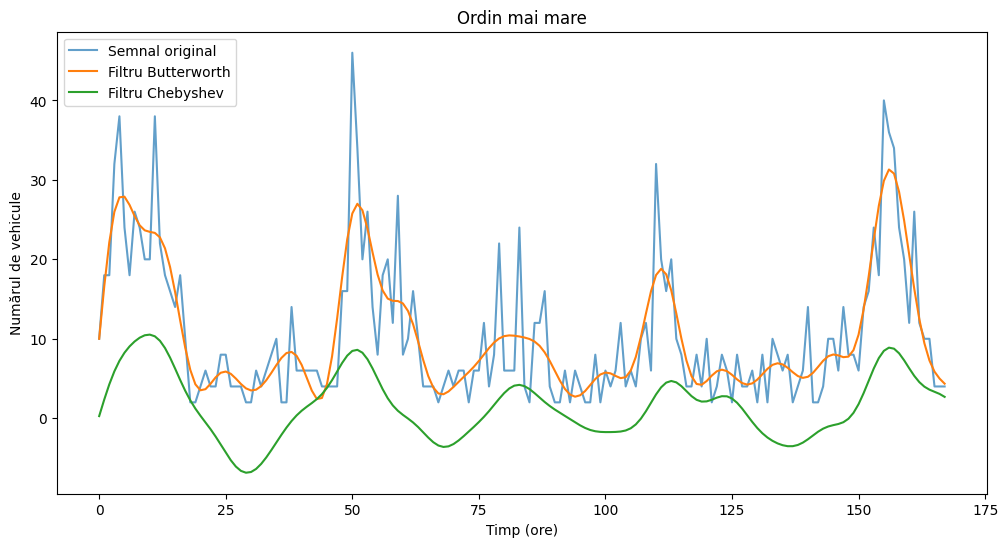

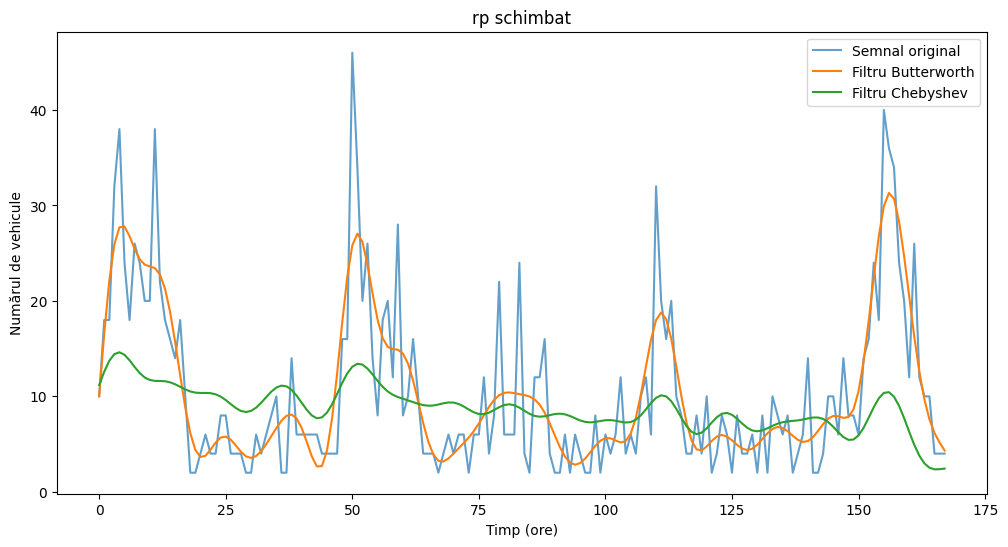

In [24]:
orders = [4, 6, 5]
rp_values = [rp, rp, rp-1]
titles = ['Ordin mai mic', 'Ordin mai mare', 'rp schimbat']

for order, rp_val, title in zip(orders, rp_values, titles):
    b_butter, a_butter = create_filter('butter', order, f_normalized)
    b_cheby, a_cheby = create_filter('cheby', order, f_normalized, rp=rp_val)

    filtered_butter = apply_filter(b_butter, a_butter, data)
    filtered_cheby = apply_filter(b_cheby, a_cheby, data)

    plot_filtered_signals(data, [filtered_butter, filtered_cheby], ['Filtru Butterworth', 'Filtru Chebyshev'], title)

    # observam  ca filtrul chebyshev are o subestimare a numarului de masini
    # astfel ne este confirmat ca ordinul optim este 5
    # in schimb pentru rp=4 observam ca estimarea este mai buna decat pentru rp=5